In [ ]:
# from google.colab import drive
# drive.mount("/content/drive")

In [ ]:
# %cd /content/drive/MyDrive/projects/

In [38]:
import dipwizards.utils as utl
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL
import requests
from io import BytesIO
import sys
from skimage.metrics import structural_similarity as compare_ssim

# Original Image

In [ ]:
# url = "https://cdn.vox-cdn.com/thumbor/T1bCicje7iVTDLq6kk_ST78FfmY=/0x0:3000x2000/1200x0/filters:focal(0x0:3000x2000):no_upscale()/cdn.vox-cdn.com/uploads/chorus_asset/file/24106924/119941191_774792496631376_702700738735193120_n_copy_cropped.jpg"
# response = requests.get(url)
# img = PIL.Image.open(BytesIO(response.content))
# img = np.array(img)

Get Image

In [56]:
image= cv2.imread( "Image/tall-lighthouse-north-sea-cloudy-sky.jpg")

Conert BGR to RGB

In [57]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

Show Image

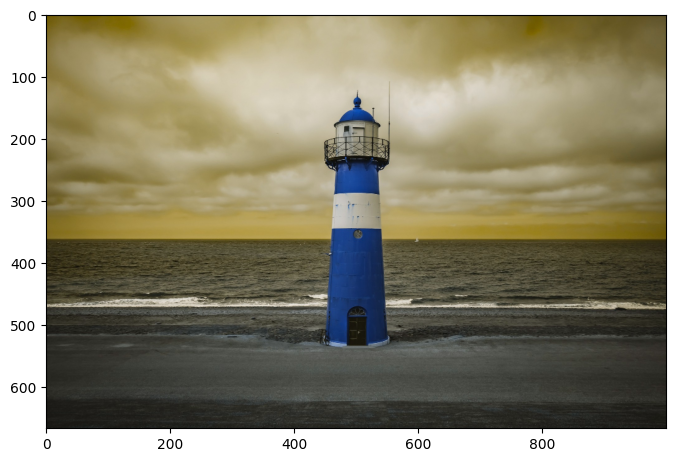

In [58]:
utl.show_img_plt(image)

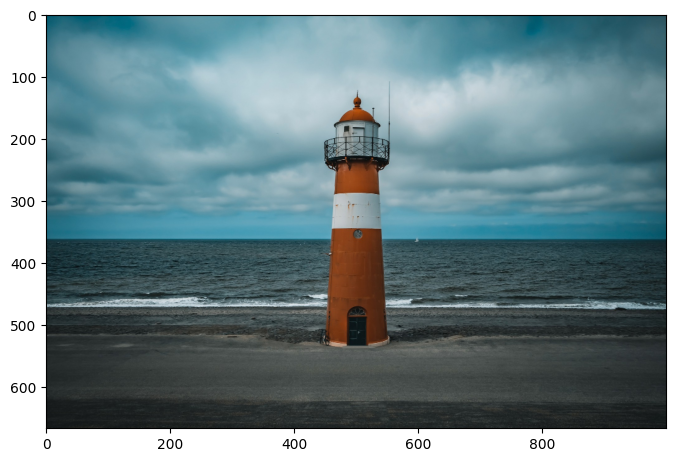

In [59]:
utl.show_img_plt(image_rgb)

Convert to gray level


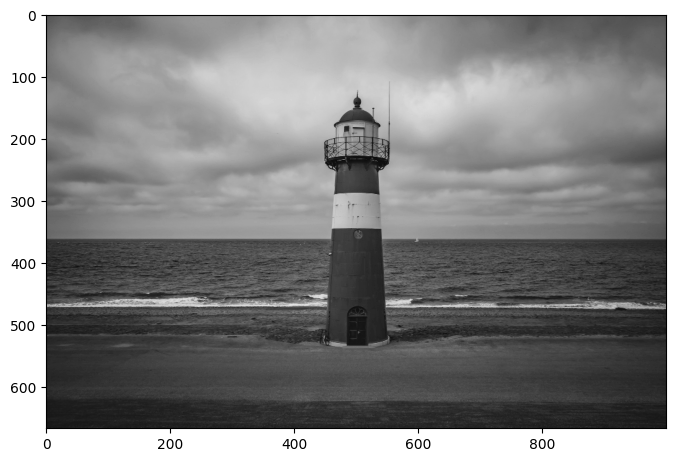

In [60]:
image_gray = cv2.cvtColor(image ,cv2.COLOR_RGB2GRAY)
utl.show_img_plt(image_gray)

# ADD Noise

In [ ]:
utl.__dict__.keys()

In [61]:
x = utl.ImageNoiseRGB(image_rgb)
x

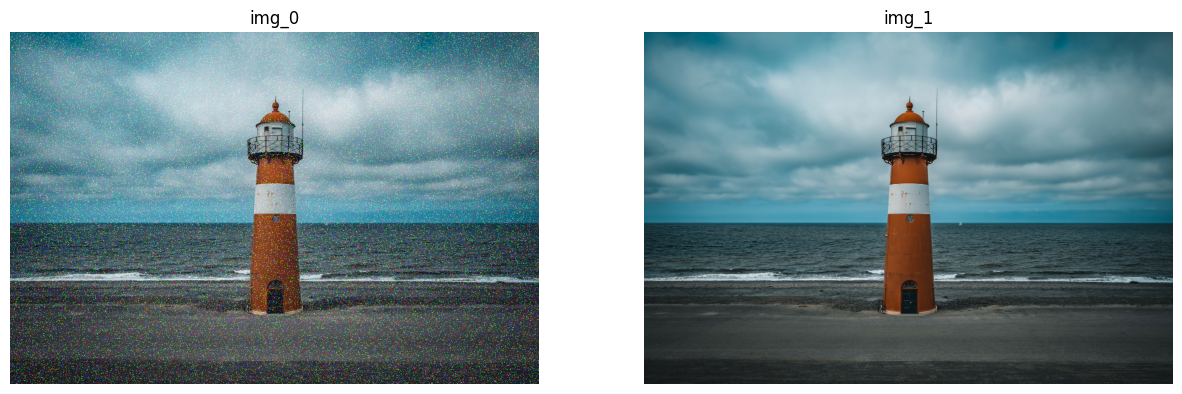

In [63]:
img_gauss = x.add_noise('gauss', var=0.4)
utl.show_mult_img(1, 2, [img_gauss, image_rgb])

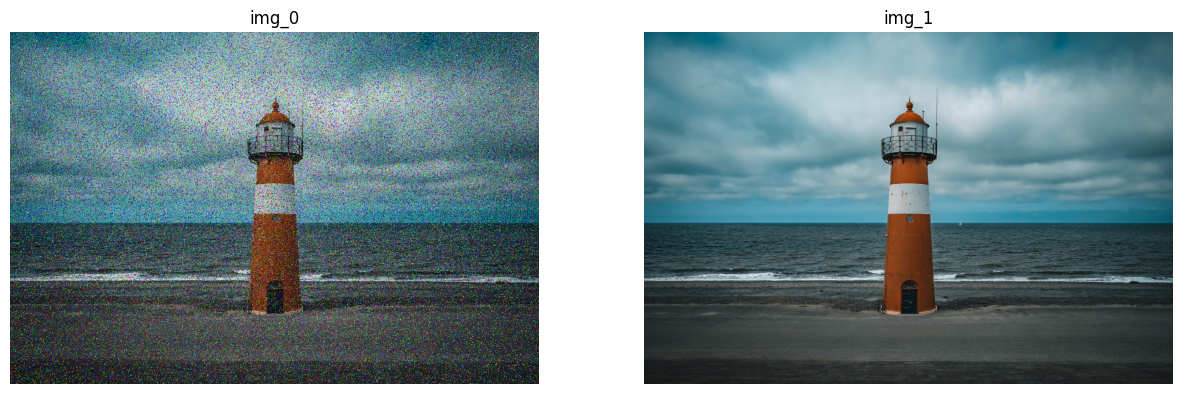

In [64]:
img_sp = x.add_noise('s&p', amount=0.2, s_vs_p=0.3)
utl.show_mult_img(1, 2, [img_sp, image_rgb])

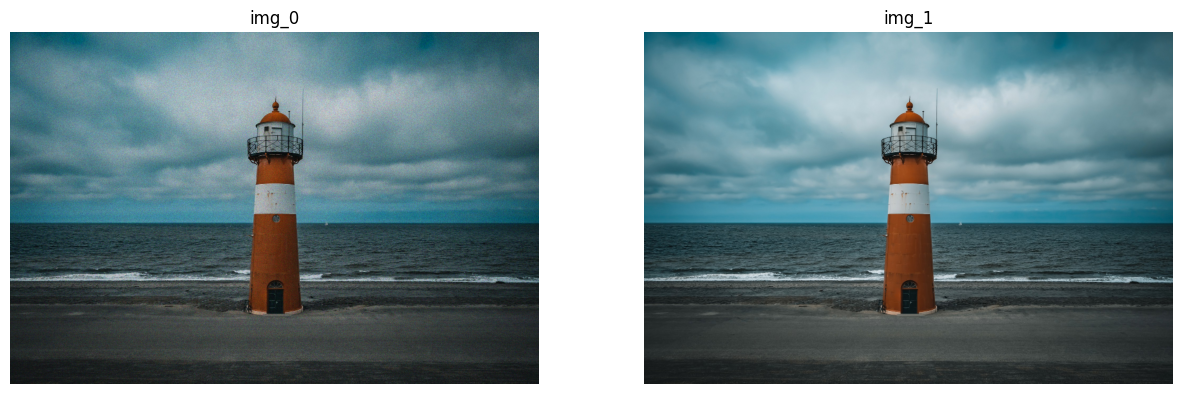

In [65]:
img_poiss = x.add_noise('poisson')
utl.show_mult_img(1, 2, [img_poiss, image_rgb])

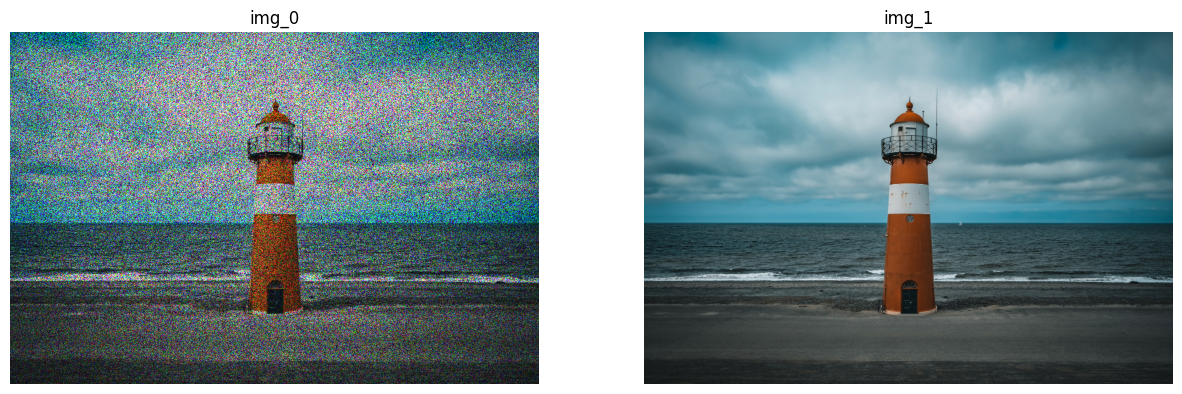

In [66]:
img_spkl = x.add_noise('speckle')
utl.show_mult_img(1, 2, [img_spkl, image_rgb])

# Spatial Filter

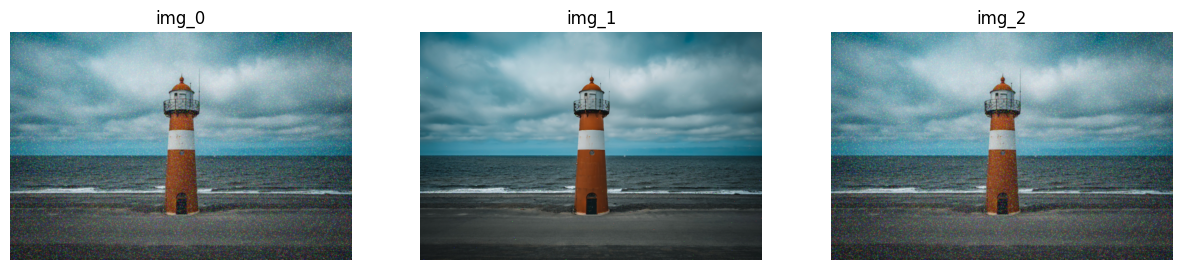

In [67]:
fmean_gauss  = utl.SpatialFilterRGB(img_gauss).apply_filter('mean',   3, 0)
fmedian_gauss  = utl.SpatialFilterRGB(np.uint8(img_gauss)).apply_filter('median', 3,0)
fmedian_adapt  = utl.SpatialFilterRGB(np.uint8(img_gauss)).apply_filter('adaptive', 3, 0)
utl.show_mult_img(1,3, [fmean_gauss,fmedian_gauss, fmean_gauss])

In [77]:
compare_ssim(image_rgb, fmedian_gauss, multichannel=True, channel_axis=-1, data_range=1.0)

0.7414232963395747

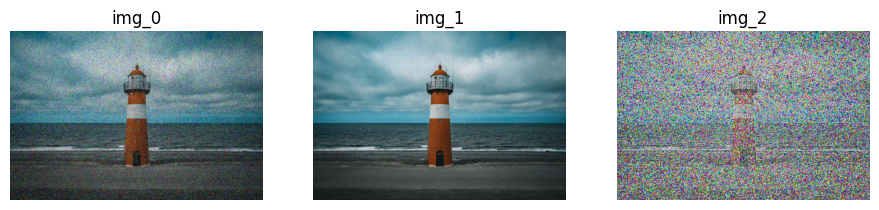

In [78]:
fmean_sp  = utl.SpatialFilterRGB(img_sp).apply_filter('mean',   3, 0)
fmedian_sp  = utl.SpatialFilterRGB(img_sp).apply_filter('median', 3, 0)
fadapt_sp  = utl.SpatialFilterRGB(np.uint8(img_sp)).apply_filter('adaptive', 3, 0)
utl.show_mult_img(1, 4, [fmean_sp, fmedian_sp, fadapt_sp])

In [79]:
compare_ssim(image_rgb, fmedian_sp, multichannel=True, channel_axis=-1, data_range=1.0)

0.6669033486045213

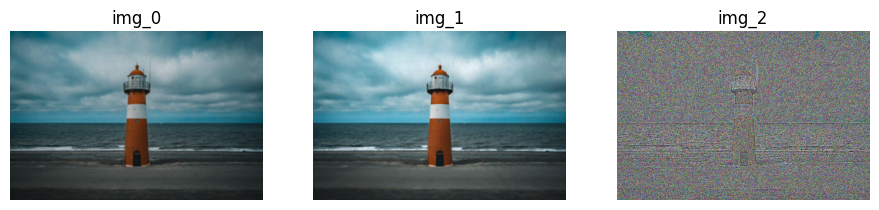

In [83]:
fmean_poiss  = utl.SpatialFilterRGB(img_poiss).apply_filter('mean',   5, 0)
fmed_poise  = utl.SpatialFilterRGB(img_poiss).apply_filter('median', 7, 0)
fadapt_poise  = utl.SpatialFilterRGB(np.uint8(img_poiss)).apply_filter('adaptive', 3, 0)
utl.show_mult_img(1, 4, [fmean_poiss, fmed_poise, fadapt_poise])

In [84]:
compare_ssim(image_rgb, fmean_poiss, multichannel=True, channel_axis=-1, data_range=1.0)

0.42377191551998356

# Frequency

### frequency

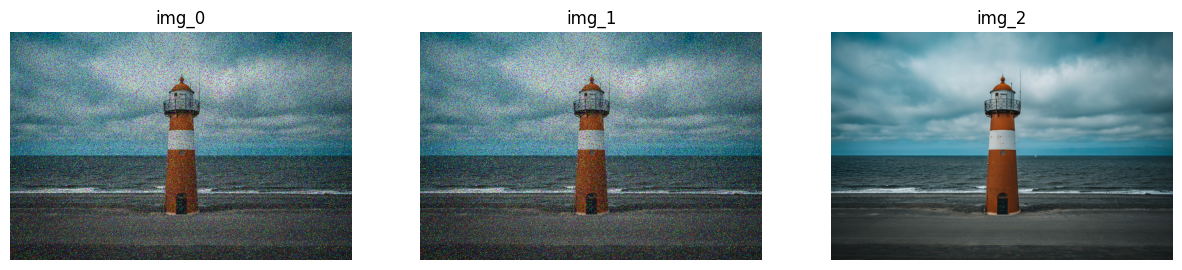

In [85]:
frequency = utl.FrequencyFilterRGB(img_sp)
filter_image = frequency.low_pass_filter(10000)
utl.show_mult_img(1, 3, [filter_image, img_sp,image_rgb])

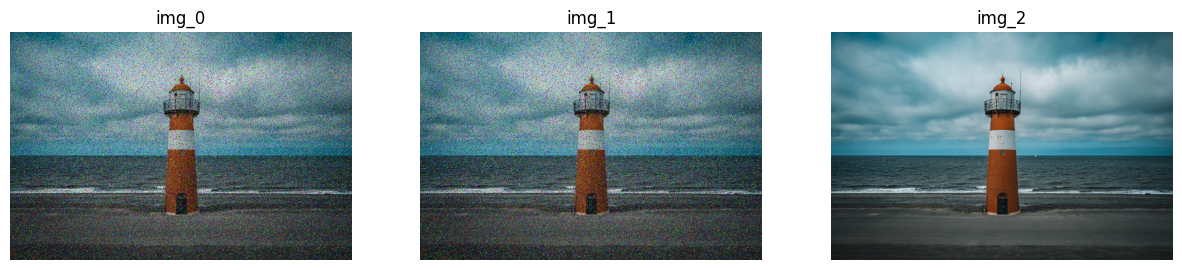

In [86]:

frequency = utl.FrequencyFilterRGB(img_sp)
filter_image = frequency.band_reject_filter( 1000, 6000)
utl.show_mult_img(1, 3, [filter_image, img_sp,image_rgb])

In [87]:
compare_ssim(img_sp, filter_image, multichannel=True, channel_axis=-1, data_range=1.0)

0.9999277427435623

# Histogram

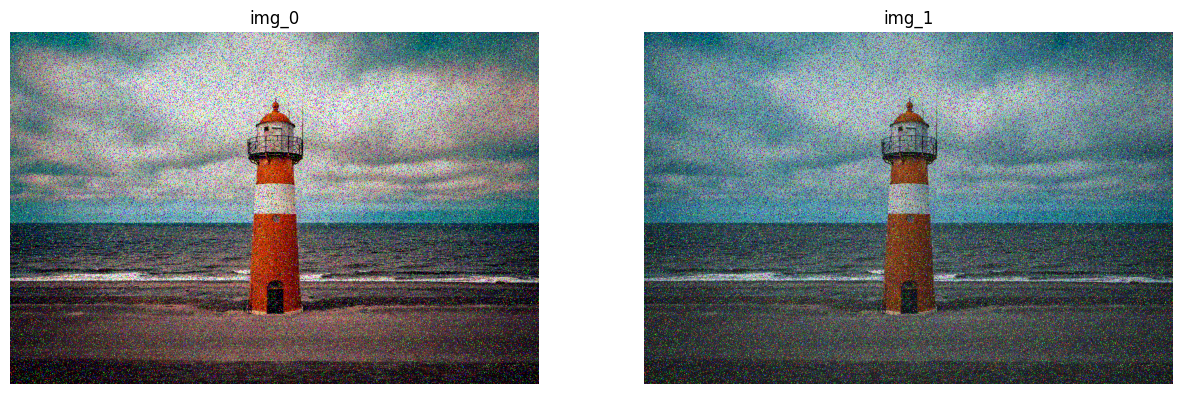

In [88]:
histo_image  = utl.HistogramEnhancementRGB(img_sp)
histo_result = histo_image.apply_histogram_equalization()
utl.show_mult_img(1, 2, [histo_result, img_sp])

In [89]:
compare_ssim(img_sp, histo_result, multichannel=True, channel_axis=-1, data_range=1.0)

0.9453018975471746

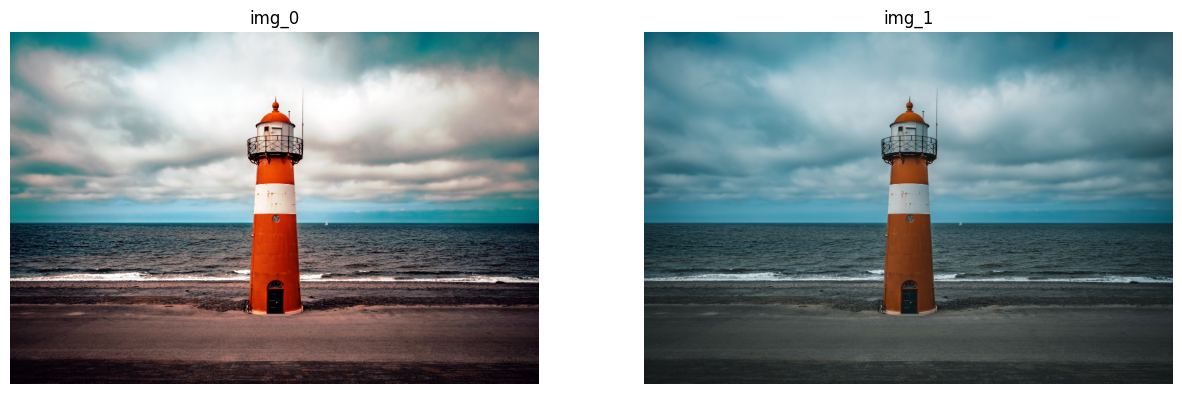

In [90]:
histo_image  = utl.HistogramEnhancementRGB(image_rgb)
histo_result = histo_image.apply_histogram_equalization()
utl.show_mult_img(1, 2, [histo_result, image_rgb])

In [91]:
compare_ssim(image, histo_result, multichannel=True, channel_axis=-1, data_range=1.0)

0.7022524277739898